# Load of Data and Processing

In [1]:
import json
import pandas as pd

records = []
with open("problems_data.jsonl", "r", encoding="utf-8") as f:
    for line in f:
        records.append(json.loads(line))

df = pd.DataFrame(records)

required_cols = [
    "title",
    "description",
    "input_description",
    "output_description",
    "problem_class",
    "problem_score"
]

assert set(required_cols).issubset(df.columns), "Missing required columns"


df.to_csv("problems_data.csv", index=False)

df.shape


(4112, 8)

In [73]:
df.head()

,title,description,input_description,output_description,sample_io,problem_class,problem_score,url,title_len,description_len,...,output_description_len,total_text_len,has_constraints,math_symbols,multi_case,problem_class_encoded,merged_text,num_count,constraint_density,algo_keyword_count
0,uuu,unununium (uuu) was the name of the chemical e...,the input consists of one line with two intege...,the output consists of $m$ lines where the $i$...,"[{'input': '7 10', 'output': '1 2 2 3 1 3 3 4 ...",hard,9.7,https://open.kattis.com/problems/uuu,1,200,...,43,285,False,0,False,1,uuu unununium (uuu) was the name of the chemic...,6,0.020979,5
1,house building,a number of eccentrics from central new york h...,"the input consists of $10$ test cases, which a...",print $k$ lines with the positions of the hous...,"[{'input': '0 2 3 2 50 60 50 30 50 40', 'outpu...",hard,9.7,https://open.kattis.com/problems/husbygge,2,184,...,42,239,False,0,False,1,house building a number of eccentrics from cen...,9,0.037500,0
2,mario or luigi,mario and luigi are playing a game where they ...,,,"[{'input': '', 'output': ''}]",hard,9.6,https://open.kattis.com/problems/marioorluigi,3,215,...,0,218,False,4,False,1,mario or luigi mario and luigi are playing a g...,9,0.041096,0
3,the wire ghost,žofka is bending a copper wire. she starts wit...,the first line contains two integers $l$ and $...,the output consists of a single line consistin...,"[{'input': '4 3 3 C 2 C 1 C', 'output': 'GHOST...",hard,9.6,https://open.kattis.com/problems/thewireghost,3,144,...,26,236,False,0,False,1,the wire ghost žofka is bending a copper wire....,7,0.029536,0
4,barking up the wrong tree,"your dog spot is let loose in the park. well, ...",the first line of input consists of two intege...,write a single line containing the length need...,"[{'input': '2 0 10 0 10 10', 'output': '14.14'...",hard,9.6,https://open.kattis.com/problems/barktree,5,286,...,29,406,False,0,False,1,barking up the wrong tree your dog spot is let...,6,0.014742,9


In [2]:

df["problem_class"].value_counts()


hard      1941
medium    1405
easy       766
Name: problem_class, dtype: int64

In [3]:

df["problem_score"].describe()


count    4112.000000
mean        5.114689
std         2.177770
min         1.100000
25%         3.300000
50%         5.200000
75%         6.900000
max         9.700000
Name: problem_score, dtype: float64

In [4]:
text_cols = [
    "title",
    "description",
    "input_description",
    "output_description"
]

for col in text_cols:
    df[col] = df[col].fillna("")
    df[col + "_len"] = df[col].apply(lambda x: len(x.split()))

df["total_text_len"] = df[[c + "_len" for c in text_cols]].sum(axis=1)

df.groupby("problem_class")["total_text_len"].mean()


problem_class
easy      217.143603
hard      296.022154
medium    271.855516
Name: total_text_len, dtype: float64

In [5]:
import re

def count_pattern(text, pattern):
    return len(re.findall(pattern, text.lower()))

df["has_constraints"] = df["description"].str.contains("constraint", case=False)
df["math_symbols"] = df["description"].apply(lambda x: count_pattern(x, r"[<>=*/^]"))
df["multi_case"] = df["description"].str.contains(
    "multiple test|each test|for each test", case=False
)

df.groupby("problem_class")[["has_constraints", "math_symbols", "multi_case"]].mean()


,has_constraints,math_symbols,multi_case
problem_class,,,
easy,0.009138,0.676240,0.001305
hard,0.026275,1.082947,0.001546
medium,0.017794,0.974377,0.002847


In [6]:

missing_pct = df.isnull().mean().sort_values(ascending=False) * 100
missing_pct


title                     0.0
description               0.0
input_description         0.0
output_description        0.0
sample_io                 0.0
problem_class             0.0
problem_score             0.0
url                       0.0
title_len                 0.0
description_len           0.0
input_description_len     0.0
output_description_len    0.0
total_text_len            0.0
has_constraints           0.0
math_symbols              0.0
multi_case                0.0
dtype: float64

# EDA

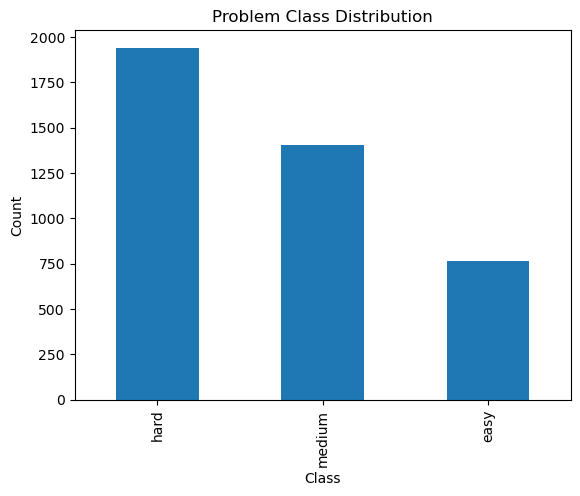

In [7]:
import matplotlib.pyplot as plt

df["problem_class"].value_counts().plot(kind="bar")
plt.title("Problem Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


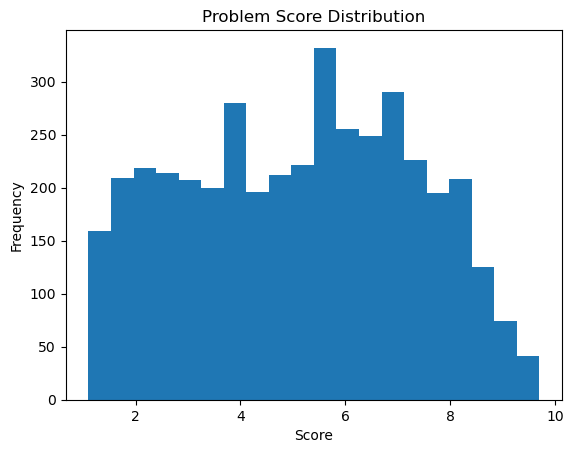

In [8]:
import matplotlib.pyplot as plt

plt.hist(df["problem_score"], bins=20)
plt.title("Problem Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


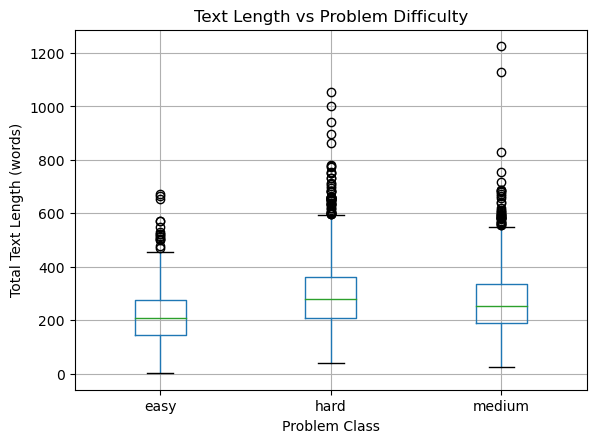

In [9]:
import matplotlib.pyplot as plt

df.boxplot(column="total_text_len", by="problem_class")
plt.title("Text Length vs Problem Difficulty")
plt.suptitle("")
plt.xlabel("Problem Class")
plt.ylabel("Total Text Length (words)")
plt.show()


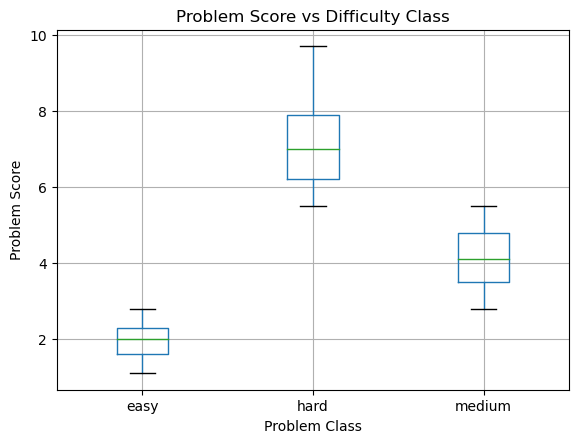

In [10]:
import matplotlib.pyplot as plt

df.boxplot(column="problem_score", by="problem_class")
plt.title("Problem Score vs Difficulty Class")
plt.suptitle("")
plt.xlabel("Problem Class")
plt.ylabel("Problem Score")
plt.show()


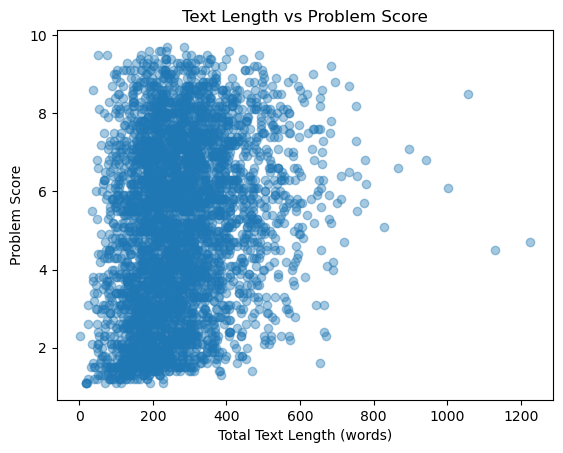

In [11]:
plt.scatter(df["total_text_len"], df["problem_score"], alpha=0.4)
plt.xlabel("Total Text Length (words)")
plt.ylabel("Problem Score")
plt.title("Text Length vs Problem Score")
plt.show()


# Preprocessing

In [12]:
import re

def normalize_text(text):
    text = text.lower()
    text = re.sub(r"\s+", " ", text).strip()
    return text

for col in ["title", "description", "input_description", "output_description"]:
    df[col] = df[col].apply(normalize_text)


In [13]:
from sklearn.preprocessing import LabelEncoder


df["problem_class"] = df["problem_class"].str.lower().str.strip()

le = LabelEncoder()
df["problem_class_encoded"] = le.fit_transform(df["problem_class"])


dict(zip(le.classes_, le.transform(le.classes_)))


{'easy': 0, 'hard': 1, 'medium': 2}

In [14]:

assert df.isnull().sum().sum() == 0, "Missing values found after preprocessing"

df.to_csv("problems_processed.csv", index=False)

df.shape


(4112, 17)

# Feature engineering

In [15]:
df["merged_text"] = (
    df["title"] + " " +
    df["description"] + " " +
    df["input_description"] + " " +
    df["output_description"]
)

df["merged_text"].str.len().describe()


count    4112.000000
mean     1517.498541
std       700.755745
min        10.000000
25%      1042.000000
50%      1421.000000
75%      1871.000000
max      6649.000000
Name: merged_text, dtype: float64

In [61]:
import re


def count_numbers(text):
    return len(re.findall(r"\d+", text))

df["num_count"] = df["merged_text"].apply(count_numbers)
df["constraint_density"] = df["num_count"] / (df["total_text_len"] + 1)



algo_keywords = [
    "dp", "dynamic programming", "graph", "tree", "bfs", "dfs",
    "greedy", "heap", "priority queue", "segment tree",
    "binary indexed tree", "bitmask", "recursion"
]

def keyword_count(text):
    text = text.lower()
    return sum(text.count(k) for k in algo_keywords)

df["algo_keyword_count"] = df["merged_text"].apply(keyword_count)


df[["constraint_density", "algo_keyword_count"]].describe()


,constraint_density,algo_keyword_count
count,4112.000000,4112.000000
mean,0.042030,0.636187
std,0.036275,2.248259
min,0.000000,0.000000
25%,0.018957,0.000000
50%,0.032967,0.000000
75%,0.053853,0.000000
max,0.401163,25.000000


In [78]:
print(df.columns)

Index(['title', 'description', 'input_description', 'output_description',
       'sample_io', 'problem_class', 'problem_score', 'url', 'title_len',
       'description_len', 'input_description_len', 'output_description_len',
       'total_text_len', 'has_constraints', 'math_symbols', 'multi_case',
       'problem_class_encoded', 'merged_text', 'num_count',
       'constraint_density', 'algo_keyword_count'],
      dtype='object')


In [63]:

y_class = df["problem_class"]
y_score = df["problem_score"]


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.9,
    max_features=20000,
    sublinear_tf=True
)

X_text = tfidf.fit_transform(df["merged_text"])

X_text.shape


(4112, 20000)

In [65]:


from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_clf = label_encoder.fit_transform(y_class)


X_clf = X_text


X_clf_train = X_clf[train_idx]
X_clf_val   = X_clf[val_idx]

y_clf_train = y_clf[train_idx]
y_clf_val   = y_clf[val_idx]

np.unique(y_clf_train), np.unique(y_clf_val), X_clf_train.shape, X_clf_val.shape


(array([0, 1, 2]), array([0, 1, 2]), (3289, 20000), (823, 20000))

# Classification

In [66]:

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

clf = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

clf.fit(X_clf_train, y_clf_train)

y_clf_pred = clf.predict(X_clf_val)
accuracy_score(y_clf_val, y_clf_pred)


0.5273390036452005

In [67]:
import joblib

joblib.dump(tfidf, "models/tfidf_vectorizer.pkl")
joblib.dump(label_encoder, "models/label_encoder.pkl")
joblib.dump(clf, "models/xgb_classifier_final.pkl")


['models/xgb_classifier_final.pkl']

In [80]:
from sklearn.metrics import accuracy_score

clf_acc = accuracy_score(y_clf_val, y_clf_pred)
clf_acc


0.5273390036452005

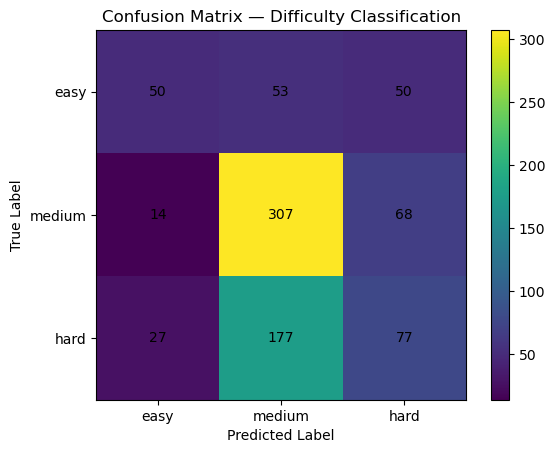

In [81]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_clf_val, y_clf_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix — Difficulty Classification")
plt.colorbar()

labels = ["easy", "medium", "hard"]
plt.xticks(np.arange(3), labels)
plt.yticks(np.arange(3), labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

for i in range(3):
    for j in range(3):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


# Regression

In [69]:


from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler

numeric_cols = [
    "total_text_len",
    "title_len",
    "math_symbols",
    "has_constraints",
    "multi_case",
    "constraint_density",
    "algo_keyword_count"
]

X_num = df[numeric_cols].astype(float)

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)


X_reg = hstack([X_text, X_num_scaled])
from scipy.sparse import csr_matrix
X_reg = csr_matrix(X_reg)


X_reg.shape


(4112, 20007)

In [70]:


from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np


y_reg = y_score.values


X_reg_train = X_reg[train_idx]
X_reg_val   = X_reg[val_idx]

y_reg_train = y_reg[train_idx]
y_reg_val   = y_reg[val_idx]

reg = XGBRegressor(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

reg.fit(X_reg_train, y_reg_train)

y_reg_pred = reg.predict(X_reg_val)

mean_absolute_error(y_reg_val, y_reg_pred), r2_score(y_reg_val, y_reg_pred)


(1.6508747404429922, 0.1823412852422569)

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_reg_val, y_reg_pred)
rmse = np.sqrt(mean_squared_error(y_reg_val, y_reg_pred))

mae, rmse


(1.6508747404429922, 1.9919513711807824)

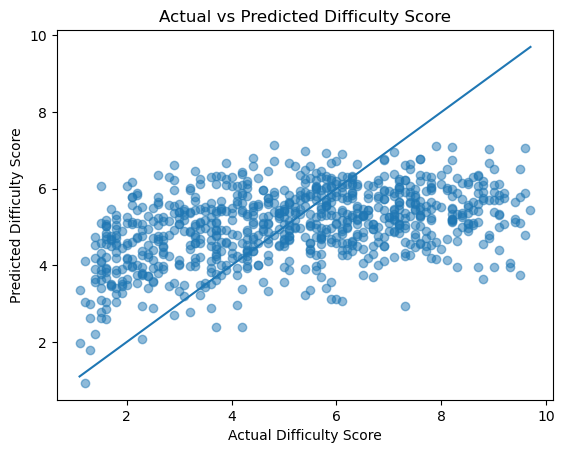

In [83]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_reg_val, y_reg_pred, alpha=0.5)
plt.plot([y_reg_val.min(), y_reg_val.max()],
         [y_reg_val.min(), y_reg_val.max()])

plt.xlabel("Actual Difficulty Score")
plt.ylabel("Predicted Difficulty Score")
plt.title("Actual vs Predicted Difficulty Score")

plt.show()


In [71]:
import joblib

joblib.dump(reg, "models/xgb_regressor_final.pkl")
joblib.dump(scaler, "models/numeric_scaler.pkl")


['models/numeric_scaler.pkl']